In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Convert categorical columns
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [5]:
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

# Separate labels
train_labels = train_dataset.pop('charges')
test_labels = test_dataset.pop('charges')


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_dataset_scaled = scaler.fit_transform(train_dataset)
test_dataset_scaled = scaler.transform(test_dataset)


In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[train_dataset.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_dataset_scaled, train_labels,
    validation_split=0.2,
    epochs=100,
    verbose=1
)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 13935.0635 - mae: 13935.0635 - val_loss: 12653.2754 - val_mae: 12653.2754
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14407.4609 - mae: 14407.4609 - val_loss: 12647.2188 - val_mae: 12647.2188
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13181.8975 - mae: 13181.8975 - val_loss: 12633.9307 - val_mae: 12633.9307
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13644.0088 - mae: 13644.0088 - val_loss: 12608.2441 - val_mae: 12608.2441
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13702.0391 - mae: 13702.0391 - val_loss: 12564.0547 - val_mae: 12564.0547
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13330.1357 - mae: 13330.1357 - val_loss: 12494.7344 - val_mae: 12494.7344
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13347.0684 - mae: 13347.0684 - val_loss: 12393.9336 - val_mae: 12393.9336
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13148.922

In [9]:
loss, mae = model.evaluate(test_dataset_scaled, test_labels, verbose=2)
print(f"\nMean Absolute Error on test data: ${mae:.2f}")


9/9 - 0s - 6ms/step - loss: 2767.3992 - mae: 2767.3992

Mean Absolute Error on test data: $2767.40


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


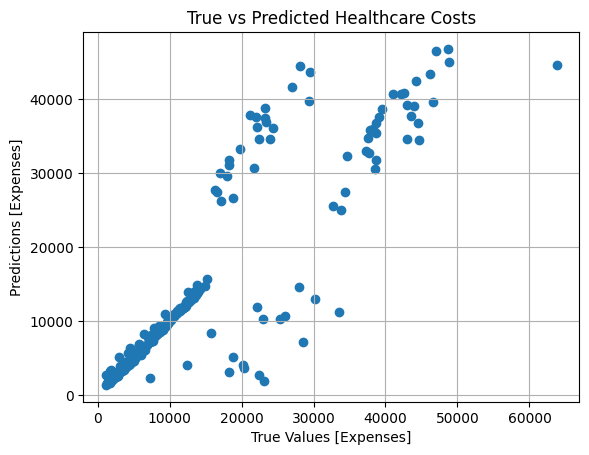

In [10]:
test_predictions = model.predict(test_dataset_scaled).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Expenses]')
plt.ylabel('Predictions [Expenses]')
plt.title('True vs Predicted Healthcare Costs')
plt.grid(True)
plt.show()
